In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('data/raw_19.csv', index_col=0)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2019 = data.copy()

In [6]:
df2019.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

# <span style="color:red">convert string to datetime objects</span>



In [19]:
df2019.pub_date.unique()

array(['2019-01-01T00:00:03+0000', '2019-01-01T00:00:07+0000',
       '2019-01-01T00:15:31+0000', ..., '2019-12-31T23:05:04+0000',
       '2019-12-31T23:17:09+0000', '2019-12-31T23:52:00+0000'],
      dtype=object)

In [20]:
type(df2019.pub_date[0])

str

In [ ]:
histtype{'bar', 'barstacked', 'step', 'stepfilled'}

In [176]:
df2019.word_count.max()

20056

array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

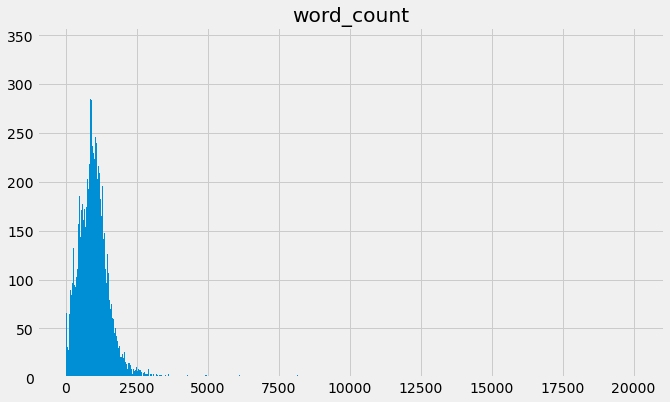

In [62]:
df2019.hist(bins=df2019.word_count.unique().shape[0],
            column='word_count', figsize=(10,6))

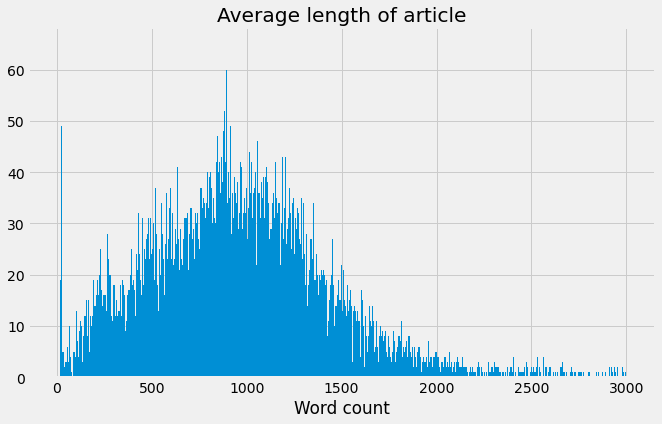

In [180]:
word_counts = df2019.word_count
bins = bins=df2019.word_count.unique().shape[0]

fix, ax = plt.subplots(figsize=(10,6))

ax.hist(word_counts,bins=3000, range=(0,3000))

ax.set_title("Average length of article")
plt.xlabel('Word count')

plt.savefig('hist_wordcount_2019');

In [63]:
df2019.word_count.unique().shape[0]

3081

<AxesSubplot:>

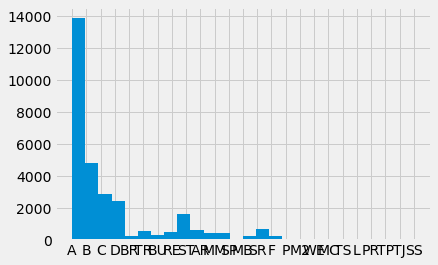

In [64]:
df2019.print_section.hist(bins=df2019.print_section.unique().shape[0])

<AxesSubplot:>

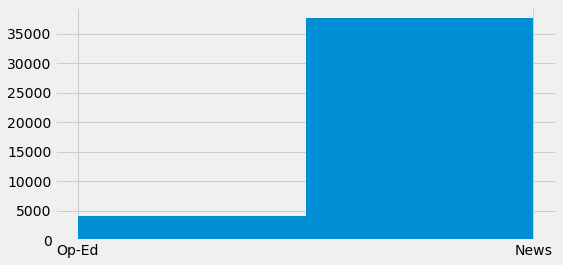

In [92]:
df2019.type_of_material.hist(bins=df2019.type_of_material.unique().shape[0], figsize=(8,4))

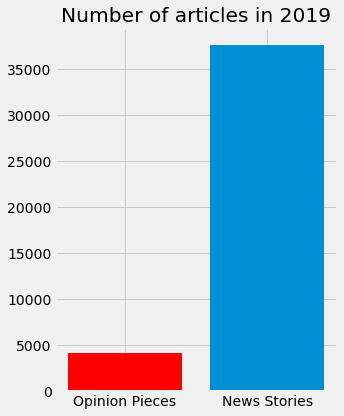

In [165]:
labels = ['Opinion Pieces', 'News Stories']
colors = ['red', 'blue']
data = df2019.type_of_material.value_counts().values[::-1]

fig, ax = plt.subplots(figsize=(5,6))

ax.bar(labels[0], data[0], color='red')
ax.bar(labels[1], data[1])

ax.set_title('Number of articles in 2019')

plt.tight_layout()
plt.savefig('num_opednews_2019');

In [124]:
a = df2019.type_of_material.value_counts()

In [134]:
df2019.type_of_material.unique()

array(['Op-Ed', 'News'], dtype=object)

array([37609,  4139])

# <span style="color:red">which page is an article on? can i predict which page a story is from?</span>

In [10]:
df2019.print_page.unique().shape

(3,)

In [11]:
pages_used = np.sort(df2019.print_page.unique())

In [12]:
pages_used

array([19., 21., nan])

# <span style="color:red">should I include all these subsections?</span>

In [264]:
subsectionsdf = data.copy()

In [267]:
news_subsections = subsectionsdf[subsectionsdf.type_of_material == 'News']
oped_subsections = subsectionsdf[subsectionsdf.type_of_material == 'Op-Ed']

In [269]:
news_subsections.subsection_name.unique()

array([nan, 'Middle East', 'Europe', 'Asia Pacific', 'Self-Care',
       'Politics', 'Move', 'Book Review', 'Media', 'Americas', 'Weddings',
       'Television', 'Commercial Real Estate', 'Dance', 'DealBook',
       'The Daily', 'College Football', 'Eat', 'Personal Tech',
       'Art & Design', 'Live', 'Australia', 'Mind', 'Music', 'Golf',
       'Family', 'Economy', 'Baseball', 'Africa', 'Energy & Environment ',
       'Pro Basketball', 'Lesson Plans', 'Wine, Beer & Cocktails',
       'Soccer', 'Canada', 'Tennis', 'Wirecutter', 'Hockey',
       'Pro Football', 'Mutual Funds', 'Olympics', 'Learning', 'Skiing',
       'Fashion & Beauty', "Women's Runway", 'Taxes', 'América',
       'Books Update', 'Horse Racing', 'College Basketball',
       'Design & Interiors', 'Rugby', 'Elections', 'Men’s Style',
       'Entrepreneurship', 'Travel', 'Entertainment', 'Sailing',
       'Auto Racing', 'Art', 'Cycling', 'Food', 'New York Today',
       'Retirement', 'Space & Cosmos', 'International Busin

In [268]:
oped_subsections.subsection_name.unique()

array([nan, 'Sunday Review', 'Opinion | Business & Economics',
       'Personal Tech', 'Opinion | The World', 'Columnists',
       'Opinion | Religion', 'Contributors', 'Opinion | Race & Identity',
       'Opinion | Technology', 'Opinion | Politics', 'Opinion | Culture',
       'Opinion | Health', 'International Opinion'], dtype=object)

In [14]:
#news = jan19df[jan19df['type_of_material'] == 'News']

In [15]:
#oped = jan19df[jan19df['type_of_material'] == 'Op-Ed']

In [16]:
#jan19df.word_count

In [17]:
#news.subsection_name.unique().shape[0]           

In [18]:
#news.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(news.subsection_name.unique().shape[0]));

In [19]:
#oped.subsection_name.unique()

In [20]:
#oped.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(oped.subsection_name.unique().shape[0]));

In [21]:
#jan19df.columns

# remove first and last words from text

In [41]:
df2019 = data.copy()

In [42]:
df2019.word_count[0]

2248

In [43]:
df2019.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

In [77]:
oped = df2019[df2019.type_of_material == "Op-Ed"]

In [87]:
news = df2019[df2019.type_of_material == "News"]

In [91]:
print(news.lead_paragraph.iloc[1])
print(news.text.iloc[1][:300])

The unified command responsible for the United States’ nuclear strike capabilities drew attention on Monday when it tweeted a message and video that threatened the possibility of dropping a bomb.
['The unified command responsible for the United States’ nuclear strike capabilities drew attention on Monday when it tweeted a message and video that threatened the possibility of dropping a bomb.', 'In the tweet, which was posted as Americans prepared to celebrate New Year’s Eve and was deleted ab


In [102]:
news.word_count.unique().shape

(3027,)

(1343,)

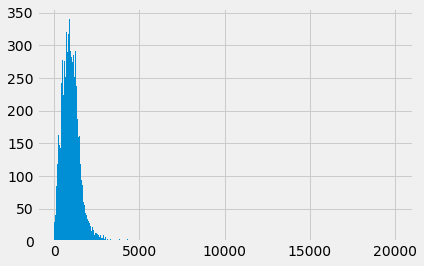

In [109]:
news.word_count.hist(bins = 2000)
#news.word_count.unique().sum()

In [119]:
oped.word_count.unique().shape

(1343,)

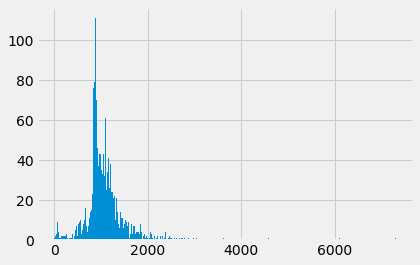

In [120]:
oped.word_count.hist(bins = 1000)

In [199]:
df2019.shape

(41748, 21)

In [198]:
df2019.isna().sum()

abstract                1
web_url                 0
snippet                18
lead_paragraph        216
source                  0
multimedia              0
headline                0
keywords                0
pub_date                0
document_type           0
news_desk               0
section_name            0
byline                  0
type_of_material        0
_id                     0
word_count              0
uri                     0
print_section       11492
print_page          11493
subsection_name     23648
text                    0
dtype: int64

In [163]:
oped_less_500 = oped[oped.word_count < 500]

In [195]:
oped_less_500.isna().sum()

abstract              0
web_url               0
snippet               0
lead_paragraph       44
source                0
multimedia            0
headline              0
keywords              0
pub_date              0
document_type         0
news_desk             0
section_name          0
byline                0
type_of_material      0
_id                   0
word_count            0
uri                   0
print_section       156
print_page          156
subsection_name     161
text                  0
dtype: int64

In [164]:
oped_wc_56 = oped[oped.word_count == 56]

In [173]:
#oped_wc_56.to_csv('2019_cartoon.csv')

In [174]:
oped_wc_56.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

In [187]:
oped_wc_56.uri.iloc[0]

'nyt://article/e35691d7-f18b-5317-b34d-684bda214b24'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd29adf310>]],
      dtype=object)

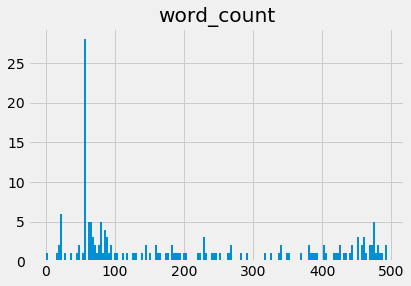

In [126]:
oped_less_500.hist(bins=169)

In [61]:
df2019.text[0]

"['Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. ', 'In his essay “The Crack-Up,” F. Scott Fitzgerald wrote, “The test of a first-rate intelligence is the ability to hold two opposed ideas in the mind at the same time, and still retain the ability to function.”', 'On New Year’s Day 1919, the headlines in The New York Times gave a hint of how difficult that would be for Americans, struggling to live up to the shimmering promises they had made to the world during the Great War, which had ended just over a month before.', 'Poles, newly independent but already threatened by their neighbors, were calling on Americans to protect them. Other countries, like Ireland, were on the cusp of independence, but asking for help. A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World.', 'Overwhelmingly, Americans lo

In [45]:
df2019.abstract[0]

'From the Treaty of Versailles to Prohibition, the events of that year shaped America, and the world, for a century to come. '

In [46]:
df2019.snippet[0]

'From the Treaty of Versailles to Prohibition, the events of that year shaped America, and the world, for a century to come. '

In [47]:
df2019.lead_paragraph[0]

'Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. '

In [48]:
df2019.web_url[0]

'https://www.nytimes.com/2018/12/31/opinion/1919-america.html'

In [49]:
df2019.byline[0]

"{'original': 'By Ted Widmer', 'person': [{'firstname': 'Ted', 'middlename': None, 'lastname': 'Widmer', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}"

In [50]:
#split by df.lead_paragraph or other column to get better parse of articles!

In [51]:
lead_paragraph = df2019.lead_paragraph[0]

In [52]:
lead_paragraph

'Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. '

In [53]:
byline = df2019.byline[0]

In [54]:
byline

"{'original': 'By Ted Widmer', 'person': [{'firstname': 'Ted', 'middlename': None, 'lastname': 'Widmer', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}"

# isna work

In [200]:
df_isna = data.copy()

In [206]:
df_isna.isna().sum()

abstract                1
web_url                 0
snippet                18
lead_paragraph        216
source                  0
multimedia              0
headline                0
keywords                0
pub_date                0
document_type           0
news_desk               0
section_name            0
byline                  0
type_of_material        0
_id                     0
word_count              0
uri                     0
print_section       11492
print_page          11493
subsection_name     23648
text                    0
dtype: int64

## abstract isna

In [207]:
df_abstract_isna = df_isna[df_isna.abstract.isna()]

In [211]:
df_abstract_isna.web_url.iloc[0]
#'https://www.nytimes.com/2019/12/24/business/butcher-baker-candlestick-maker.html'
#can be dropped.
#ALSO HAD NA IN SNIPPIT

'https://www.nytimes.com/2019/12/24/business/butcher-baker-candlestick-maker.html'

## snipped isna

In [246]:
df_snippet_isna = df_isna[df_isna.snippet.isna()]

In [248]:
df_snippet_isna.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

In [249]:
df_snippet_isna.subsection_name

16093              NaN
16689       Television
19190              NaN
20848    Sunday Review
26924              NaN
28904              NaN
30416         Politics
32823              NaN
35292              NaN
36170              NaN
37059              NaN
37928              NaN
38607              NaN
39437              NaN
40249              NaN
41041              NaN
41195              NaN
41546              NaN
Name: subsection_name, dtype: object

In [251]:
df_snippet_isna.type_of_material.loc[20848]

'Op-Ed'

In [ ]:
#drop news stories w/out snippet. keep op-ed stories w/out snippet.

# lead_paragraph isna

In [252]:
df_lead_isna = df_isna[df_isna.lead_paragraph.isna()]

In [260]:
news_lead_isna = df_lead_isna[df_lead_isna.type_of_material == "News"]
oped_lead_isna = df_lead_isna[df_lead_isna.type_of_material == "Op-Ed"]

In [263]:
news_lead_isna.subsection_name

57       Book Review
230         Politics
427              NaN
911              NaN
1126             NaN
            ...     
41037            NaN
41180    Book Review
41195            NaN
41312            NaN
41393            NaN
Name: subsection_name, Length: 153, dtype: object

In [262]:
oped_lead_isna.shape

(63, 21)